Пропуски не обнаружены.
Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 4165.371459891892
MSE: 39957124.62099743
RMSE: 6321.164815205931
R²: 0.7396607021732446



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}
MAE: 1302.9076843493865
MSE: 7348419.262303609
RMSE: 2710.796794727264
R²: 0.9521216221379603



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 1557.7396658099947
MSE: 9302598.170553016
RMSE: 3050.016093490822
R²: 0.9393892353702158

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.8864864864864865
Precision: 1.0
Recall: 0.6204819277108434
F1-score: 0.7657992565055762
AUC: 0.8852866478768545
MAE: 0.17141106227002562
MSE: 0.0889310663866395
RMSE: 0.29821312242528747
R²: 0.5757891454185178



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


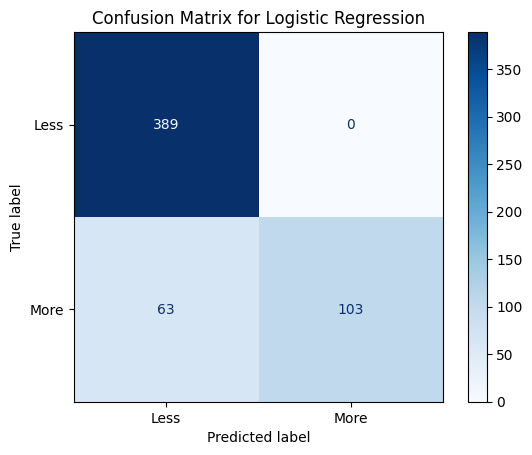

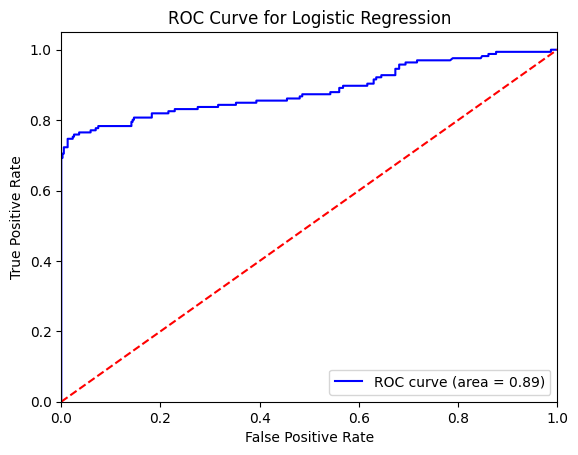

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
Accuracy: 0.9765765765765766
Precision: 0.9872611464968153
Recall: 0.9337349397590361
F1-score: 0.9597523219814241
AUC: 0.9887183696224487


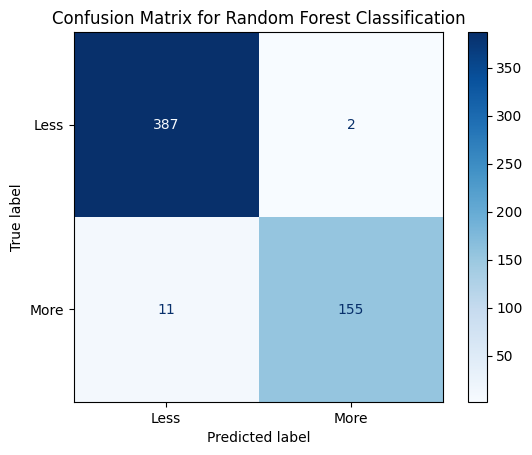

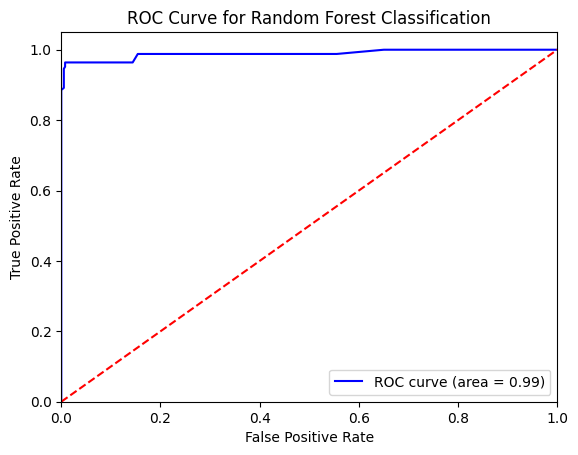

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Accuracy: 0.9621621621621622
Precision: 0.9738562091503268
Recall: 0.8975903614457831
F1-score: 0.9341692789968652
AUC: 0.9855592033945552


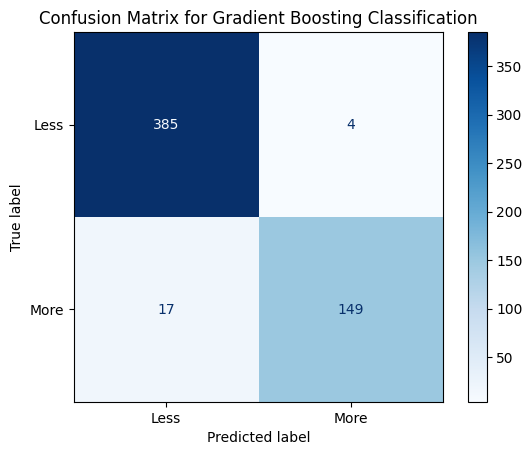

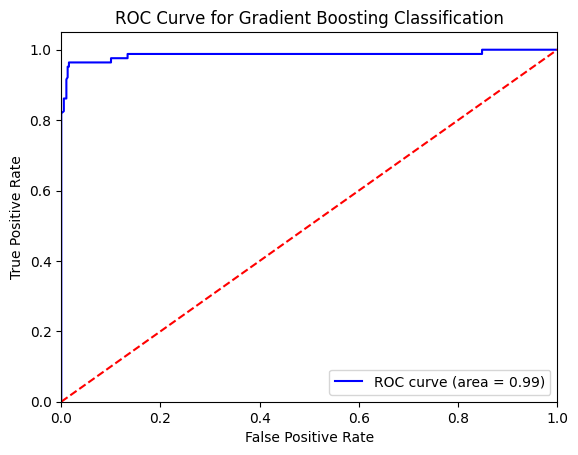

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                             roc_curve, auc)

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Проверка наличия пропусков
if df.isnull().sum().any():
    print("Пропуски обнаружены в следующих столбцах:")
    print(df.isnull().sum())
else:
    print("Пропуски не обнаружены.")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Распределяем данные на признаки и целевую переменную для задачи регрессии
X_reg = df[categorical_cols + numerical_cols]
y_reg = df['charges']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}\n")

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки и целевую переменную для задачи классификации
X_class = df[categorical_cols + numerical_cols]
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    y_pred_prob = best_model.predict_proba(X_test_class)[:, 1]  # Предсказанные вероятности для позитива
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    roc_auc = auc(*roc_curve(y_test_class, y_pred_prob)[:2])  # Добавляем вычисление AUC

    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC: {roc_auc}")

    # Вычисляем метрики MAE, MSE, RMSE и R² для логистической регрессии
    if name == "Logistic Regression":
        mae = mean_absolute_error(y_test_class, y_pred_prob)
        mse = mean_squared_error(y_test_class, y_pred_prob)
        rmse = mean_squared_error(y_test_class, y_pred_prob, squared=False)
        r2 = r2_score(y_test_class, y_pred_prob)
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R²: {r2}\n")

    # Визуализация матрицы ошибок
    cm = confusion_matrix(y_test_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Less', 'More'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()